## multiple layers perceptron (exg ch)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

### load data

In [3]:
with open("./standard_normal_data/train/grid_cc.npy", "rb") as fin:
    x_train_grid_cc = np.load(fin)
    
with open("./standard_normal_data/train/grid_exg.npy", "rb") as fin:
    x_train_grid_exg = np.load(fin)

with open("./standard_normal_data/train/grid_ch.npy", "rb") as fin:
    x_train_grid_ch = np.load(fin)
    
with open("./standard_normal_data/train/grid_cv.npy", "rb") as fin:
    x_train_grid_cv = np.load(fin)
        
with open("./standard_normal_data/train/yield_train.npy", "rb") as fin:
    y_train = np.load(fin)

In [4]:
print(x_train_grid_cc.shape)
print(x_train_grid_exg.shape)
print(x_train_grid_ch.shape)
print(x_train_grid_cv.shape)
print(y_train.shape)

(5068, 120)
(5068, 120)
(5068, 120)
(5068, 120)
(5068, 1)


In [5]:
with open("./standard_normal_data/valid/grid_cc.npy", "rb") as fin:
    x_valid_grid_cc = np.load(fin)
    
with open("./standard_normal_data/valid/grid_exg.npy", "rb") as fin:
    x_valid_grid_exg = np.load(fin)

with open("./standard_normal_data/valid/grid_ch.npy", "rb") as fin:
    x_valid_grid_ch = np.load(fin)
    
with open("./standard_normal_data/valid/grid_cv.npy", "rb") as fin:
    x_valid_grid_cv = np.load(fin)
        
with open("./standard_normal_data/valid/yield_valid.npy", "rb") as fin:
    y_valid = np.load(fin)

In [6]:
print(x_valid_grid_cc.shape)
print(x_valid_grid_exg.shape)
print(x_valid_grid_ch.shape)
print(x_valid_grid_cv.shape)
print(y_valid.shape)

(1086, 120)
(1086, 120)
(1086, 120)
(1086, 120)
(1086, 1)


In [7]:
with open("./standard_normal_data/test/grid_cc.npy", "rb") as fin:
    x_test_grid_cc = np.load(fin)
    
with open("./standard_normal_data/test/grid_exg.npy", "rb") as fin:
    x_test_grid_exg = np.load(fin)

with open("./standard_normal_data/test/grid_ch.npy", "rb") as fin:
    x_test_grid_ch = np.load(fin)
    
with open("./standard_normal_data/test/grid_cv.npy", "rb") as fin:
    x_test_grid_cv = np.load(fin)
        
with open("./standard_normal_data/test/yield_test.npy", "rb") as fin:
    y_test = np.load(fin)

In [8]:
print(x_test_grid_cc.shape)
print(x_test_grid_exg.shape)
print(x_test_grid_ch.shape)
print(x_test_grid_cv.shape)
print(y_test.shape)

(1086, 120)
(1086, 120)
(1086, 120)
(1086, 120)
(1086, 1)


In [9]:
with open("./standard_normal_data/cross_year_test/grid_cc.npy", "rb") as fin:
    x_testset_cc = np.load(fin)
    
with open("./standard_normal_data/cross_year_test/grid_exg.npy", "rb") as fin:
    x_testset_exg = np.load(fin)

with open("./standard_normal_data/cross_year_test/grid_ch.npy", "rb") as fin:
    x_testset_ch = np.load(fin)
    
with open("./standard_normal_data/cross_year_test/grid_cv.npy", "rb") as fin:
    x_testset_cv = np.load(fin)
        
with open("./standard_normal_data/cross_year_test/yield_test.npy", "rb") as fin:
    y_testset = np.load(fin)

In [10]:
print(x_testset_cc.shape)
print(x_testset_exg.shape)
print(x_testset_ch.shape)
print(x_testset_cv.shape)
print(y_testset.shape)

(3983, 120)
(3983, 120)
(3983, 120)
(3983, 120)
(3983, 1)


#### yield kg/(100m2) => kg/m2

In [11]:
y_train = y_train / 0.01
y_valid = y_valid / 0.01
y_test = y_test / 0.01
y_testset = y_testset / 0.01

#### metrics

In [12]:
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

#### exg, ch

In [13]:
x_train_cxhv = np.concatenate(
    [x_train_grid_cc, x_train_grid_exg, x_train_grid_ch, x_train_grid_cv],
    axis=1,
)

x_train_cxhv.shape, y_train.shape

((5068, 480), (5068, 1))

In [14]:
x_valid_cxhv = np.concatenate(
    [x_valid_grid_cc, x_valid_grid_exg, x_valid_grid_ch, x_valid_grid_cv],
    axis=1,
)

x_valid_cxhv.shape, y_valid.shape

((1086, 480), (1086, 1))

In [15]:
x_test_cxhv = np.concatenate(
    [x_test_grid_cc, x_test_grid_exg, x_test_grid_ch, x_test_grid_cv],
    axis=1,
)

x_test_cxhv.shape, y_test.shape

((1086, 480), (1086, 1))

In [16]:
x_testset_cxhv = np.concatenate(
    [x_testset_cc, x_testset_exg, x_testset_ch, x_testset_cv],
    axis=1,
)

x_testset_cxhv.shape, y_testset.shape

((3983, 480), (3983, 1))

### mlp

In [17]:
import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [18]:
import tensorflow as tf
import tensorflow_addons as tfa

from tensorflow import keras
from tensorflow.keras import layers 

In [19]:
import keras_tuner 

In [20]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [21]:
args = {
    "dropout": [0.2, 0.6],
    "learning_rate": [1e-5, 1e-2],
    "num_layer": [2, 10],
    "num_units": [32, 2048, 32],
    "activation": ["relu", "tanh"],
}

In [22]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())

    dropout_rate = hp.Float(
        "dr", min_value=args["dropout"][0], max_value=args["dropout"][1], sampling="log"
    )
    learning_rate = hp.Float(
        "lr",
        min_value=args["learning_rate"][0],
        max_value=args["learning_rate"][1],
        sampling="log",
    )

    for i in range(
        hp.Int(
            "num_layer", min_value=args["num_layer"][0], max_value=args["num_layer"][1]
        )
    ):
        model.add(
            layers.Dense(
                units=hp.Int(
                    f"units_{i}",
                    min_value=args["num_units"][0],
                    max_value=args["num_units"][1],
                    step=args["num_units"][2],
                ),
                activation=hp.Choice("activation", args["activation"]),
            )
        )
        if hp.Boolean("dropout"):
            model.add(layers.Dropout(rate=dropout_rate))
    # output layer
    model.add(layers.Dense(1))

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mean_squared_error",
        metrics=[tfa.metrics.r_square.RSquare()],
    )
    return model

In [23]:
build_model(keras_tuner.HyperParameters())

### model search

In [24]:
tuner_args = {
    "max_trials": 15,
    "executions_per_trial": 3,
    "project_name": "exg_ch",
}

In [25]:
# use random search
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective=keras_tuner.Objective("val_r_square", direction="max"),
    max_trials=tuner_args["max_trials"],
    executions_per_trial=tuner_args["executions_per_trial"],
    overwrite=True,
    directory="mlp_model_search",
    project_name=tuner_args["project_name"],
)

In [26]:
tuner.search(
    x_train_cxhv,
    y_train,
    epochs=100,
    validation_data=(x_valid_cxhv, y_valid),
    verbose=0,
    batch_size=64,
)

INFO:tensorflow:Oracle triggered exit


In [27]:
tuner.results_summary()

Results summary
Results in mlp_model_search/exg_ch
Showing 10 best trials
Trial summary
Hyperparameters:
dr: 0.32229168640844863
lr: 0.00014616157894890226
num_layer: 6
units_0: 1056
activation: relu
dropout: False
units_1: 192
units_2: 160
units_3: 416
units_4: 1984
units_5: 256
units_6: 32
Score: 0.8848055998484293
Trial summary
Hyperparameters:
dr: 0.21375777179795497
lr: 0.0015829314915326521
num_layer: 10
units_0: 480
activation: relu
dropout: False
units_1: 1024
units_2: 544
units_3: 704
units_4: 928
units_5: 1760
units_6: 1184
units_7: 32
units_8: 32
units_9: 32
Score: 0.8800368309020996
Trial summary
Hyperparameters:
dr: 0.23484270032248222
lr: 0.00039938740235955227
num_layer: 5
units_0: 1952
activation: relu
dropout: True
units_1: 1024
units_2: 480
units_3: 320
units_4: 832
units_5: 736
units_6: 1184
units_7: 128
units_8: 1024
units_9: 1376
Score: 0.8772725065549215
Trial summary
Hyperparameters:
dr: 0.21817258829637926
lr: 0.0015407870950216247
num_layer: 4
units_0: 1120
act

In [28]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]

In [29]:
best_model.build(input_shape=(None, 480))

In [30]:
test_pred = best_model(x_test_cxhv)
cross_year_pred = best_model(x_testset_cxhv)

In [31]:
print(f"test rmse:        {np.sqrt(mean_squared_error(y_test, test_pred)):.3f}")
print(f"cross year rmse:  {np.sqrt(mean_squared_error(y_testset, cross_year_pred)):.3f}")

test rmse:        118.930
cross year rmse:  281.451


In [32]:
print(f"test pearsonr:        {pearsonr(np.squeeze(y_test, -1), np.squeeze(test_pred.numpy(), -1))[0]:.3f}")
print(f"cross year pearsonsr: {pearsonr(np.squeeze(y_testset, -1), np.squeeze(cross_year_pred.numpy(), -1))[0]:.3f}")

test pearsonr:        0.943
cross year pearsonsr: 0.588


In [33]:
test_rmse_p = np.sqrt(mean_squared_error(y_test, test_pred)) / np.mean(y_test)
print(f"test rmse%: {test_rmse_p * 100:.2f}%")

cross_year_rmse_p = np.sqrt(mean_squared_error(y_testset, cross_year_pred)) / np.mean(y_testset)
print(f"cross year rmse%: {cross_year_rmse_p * 100:.2f}%")

test rmse%: 6.44%
cross year rmse%: 36.52%


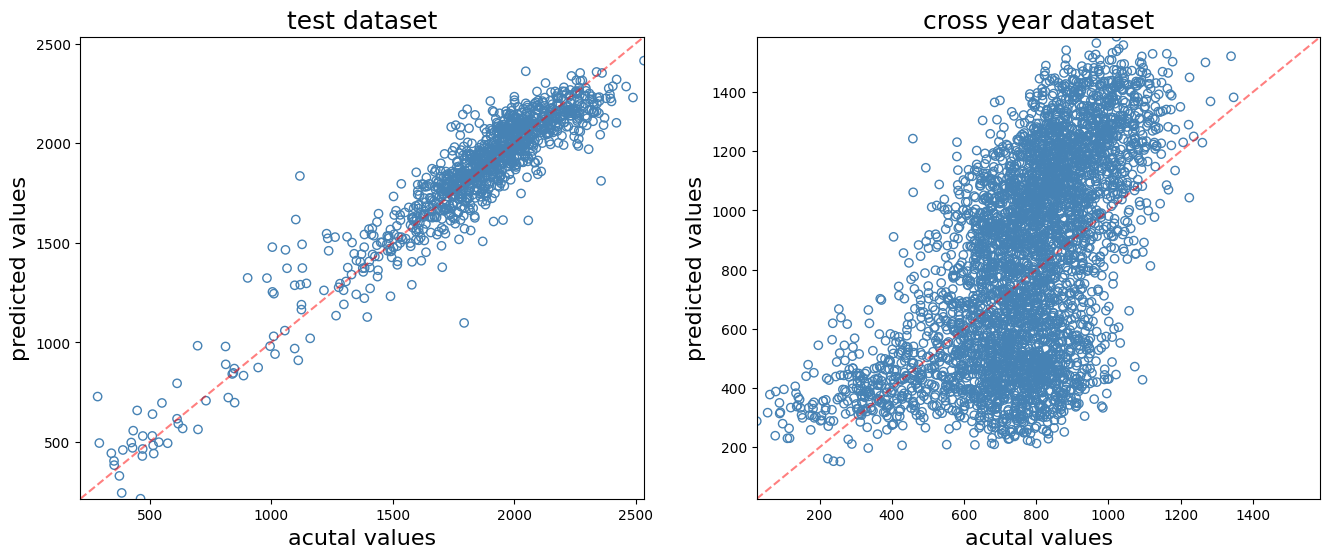

In [34]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 6))

test_min = np.min([y_test.min(), test_pred.numpy().min()])
test_max = np.max([y_test.max(), test_pred.numpy().max()])
axes[0].scatter(y_test, test_pred, facecolors="none", edgecolors="steelblue");
axes[0].set_xlim([test_min, test_max])
axes[0].set_ylim([test_min, test_max])
axes[0].set_title("test dataset", fontsize=18);
axes[0].set_xlabel("acutal values", fontsize=16);
axes[0].set_ylabel("predicted values", fontsize=16);
axes[0].plot([test_min, test_max], [test_min, test_max], linestyle="--", color="red", alpha=0.5);

cross_year_min = np.min([y_testset.min(), cross_year_pred.numpy().min()])
cross_year_max = np.max([y_testset.max(), cross_year_pred.numpy().max()])
axes[1].scatter(y_testset, cross_year_pred, facecolors="none", edgecolors="steelblue");
axes[1].set_xlim([cross_year_min, cross_year_max])
axes[1].set_ylim([cross_year_min, cross_year_max])
axes[1].set_title("cross year dataset", fontsize=18);
axes[1].set_xlabel("acutal values", fontsize=16);
axes[1].set_ylabel("predicted values", fontsize=16);
axes[1].plot([cross_year_min, cross_year_max], [cross_year_min, cross_year_max], linestyle="--", color="red", alpha=0.5);

In [35]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 480)               0         
                                                                 
 dense (Dense)               (None, 1056)              507936    
                                                                 
 dense_1 (Dense)             (None, 192)               202944    
                                                                 
 dense_2 (Dense)             (None, 160)               30880     
                                                                 
 dense_3 (Dense)             (None, 416)               66976     
                                                                 
 dense_4 (Dense)             (None, 1984)              827328    
                                                                 
 dense_5 (Dense)             (None, 256)               5

### save model

In [36]:
best_model.save("saved_model/model_xh")

INFO:tensorflow:Assets written to: saved_model/model_xh/assets


INFO:tensorflow:Assets written to: saved_model/model_xh/assets
